In [24]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [25]:
#Reading the dataset and storing into a dataframe
data_pickup = pd.read_csv('gmc_pickup.csv')

In [26]:
data_pickup

,X,Y
0,12.400000,11.200000
1,14.300000,12.500000
2,14.500000,12.700000
3,14.900000,13.100000
4,16.100000,14.100000
5,16.900000,14.800000
6,16.500000,14.400000
7,15.400000,13.400000
8,17.000000,14.900000
9,17.900000,15.600000


In [27]:
#Shape of the dataset
data_pickup.shape

(23, 2)

In [28]:
#Statstical details of dataset
data_pickup.describe()

,X,Y
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


In [29]:
#Cleaning the dataset
#Lets check which are the columns that contain null values
data_pickup.isnull().any()

X    False
Y    False
dtype: bool

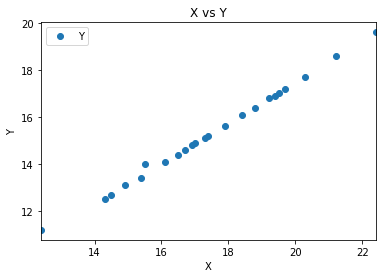

In [11]:
data_pickup.plot(x='X', y='Y', style='o')  
plt.title('X vs Y')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.show()

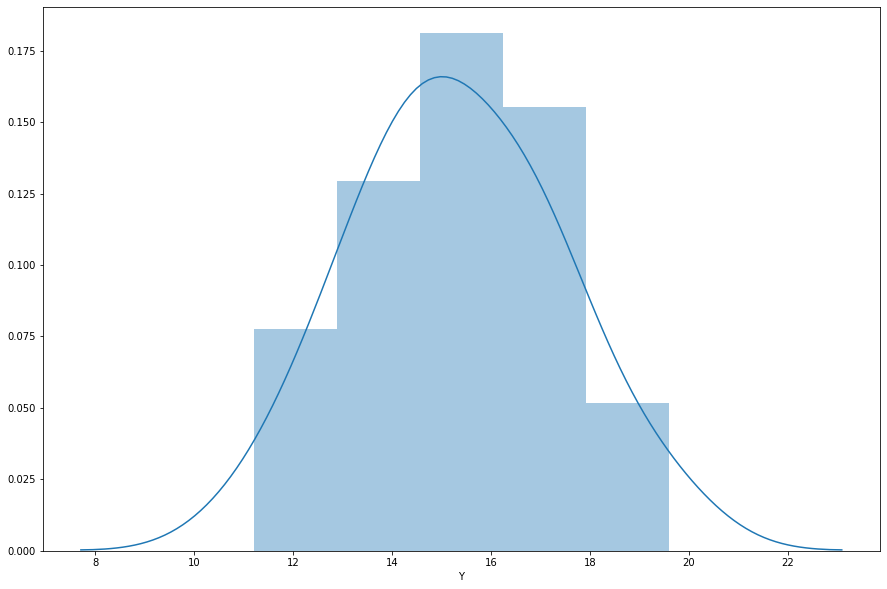

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data_pickup['Y'])

In [13]:
#Divide the dataset into attributes and labels
#X variable containfs the attribute andd Y variable contains the labels
X = data_pickup['X'].values.reshape(-1,1)
y = data_pickup['Y'].values.reshape(-1,1)

In [14]:
#Split 90% of data into training set and 10% of data into testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
#Build a linear regression model
#And lets trian our dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.42087903]
[[0.85209222]]


In [17]:
#Lets do prediction on hte dataset
y_pred = regressor.predict(X_test)

In [18]:
#Check the difference between actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,17.700001,17.718350
1,16.400000,16.440212
2,17.200001,17.207096


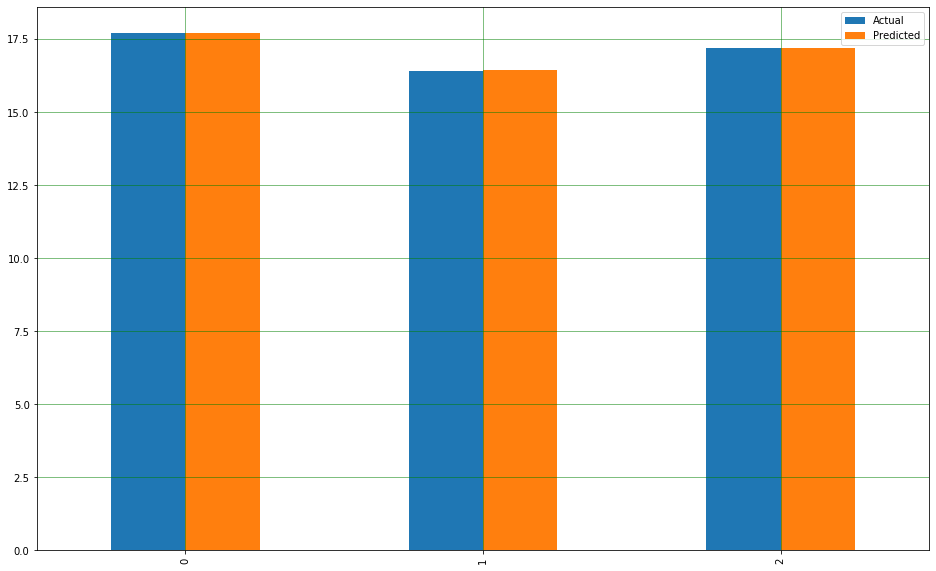

In [19]:
#Let's plot the actual and predicted values
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

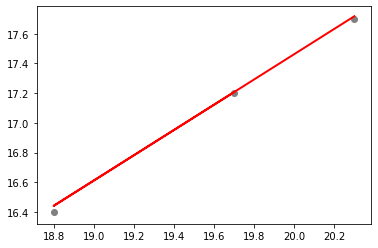

In [20]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
#Performance of the algorithm 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02188587041031198
Mean Squared Error: 0.000668031521495729
Root Mean Squared Error: 0.025846305761089514


In [39]:
# 2. Predict y for a given x = 25
y= regressor.intercept_ + (regressor.coef_ * 25)
print('if x is  then y is :',y)

if x is 25 then y is : [[21.72318443]]


In [38]:
#3. Predict y for a given x = 11
y= regressor.intercept_ + (regressor.coef_ * 11)
print('if x is 11 then y is :',y)

if x is 11 then y is : [[9.79389341]]


In [40]:
#4.Calculate Mean Absolute Error (MAE) of your model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 0.02188587041031198


#Accuracy
The value of root mean squared error is 0.026, which is less than 10% of the mean value of the Y value i.e. 15.3. 
This means that our algorithm was  very accurate and can make good predictions with the given small set of data. 
If the data set increases there is a chance that the model may not be accurate.
